In [1]:

# Regular EDA and plotting libraries
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.exceptions import ConvergenceWarning
import warnings

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score


In [2]:
DATASET_COLUMNS = ["Name","servings","dairy_product","salt","potato","vegetables","sugar","chicken","oil","beef","fruits","egg","mutton","rice","carbs","fish","dried_fish","healthy"
]
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('data.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.head()

,Name,servings,dairy_product,salt,potato,vegetables,sugar,chicken,oil,beef,fruits,egg,mutton,rice,carbs,fish,dried_fish,healthy
0,Alu Bharta,4,0.0,4.0,250,0.0,0.0,0.0,8.0,0.0,0.0,0,0,0,0,0,0,1
1,Alu Bharta,2,0.0,2.0,150,0.0,0.0,0.0,5.0,0.0,0.0,0,0,0,0,0,0,1
2,Alu Bharta,2,5.0,2.0,150,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1
3,Alu Bharta,2,0.0,4.0,250,0.0,0.0,0.0,5.0,0.0,0.0,0,0,0,0,0,0,0
4,Alu Bharta,2,5.0,4.0,250,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0


In [3]:
# Assuming 'df' is your DataFrame
sample_data = df.sample(5)

# Generate HTML table
html_table = sample_data.to_html(index=False)

# Display the HTML table
print(html_table)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Name</th>
      <th>servings</th>
      <th>dairy_product</th>
      <th>salt</th>
      <th>potato</th>
      <th>vegetables</th>
      <th>sugar</th>
      <th>chicken</th>
      <th>oil</th>
      <th>beef</th>
      <th>fruits</th>
      <th>egg</th>
      <th>mutton</th>
      <th>rice</th>
      <th>carbs</th>
      <th>fish</th>
      <th>dried_fish</th>
      <th>healthy</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Popcorn</td>
      <td>2</td>
      <td>0.0</td>
      <td>2.00</td>
      <td>0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>50.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>250</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
    </tr>
    <tr>
      <td>Dim Bhaji</td>
      <td>1</td>
      <td>0.0</td>
      <td>1.00</td>
      <td>0</td>
      <td>0.0</td>
      <td>0.

In [4]:
df.drop(["Name"], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   servings       315 non-null    int64  
 1   dairy_product  315 non-null    float64
 2   salt           315 non-null    float64
 3   potato         315 non-null    int64  
 4   vegetables     313 non-null    float64
 5   sugar          315 non-null    float64
 6   chicken        314 non-null    float64
 7   oil            315 non-null    float64
 8   beef           314 non-null    float64
 9   fruits         315 non-null    float64
 10  egg            315 non-null    int64  
 11  mutton         315 non-null    int64  
 12  rice           315 non-null    int64  
 13  carbs          315 non-null    int64  
 14  fish           315 non-null    int64  
 15  dried_fish     315 non-null    int64  
 16  healthy        315 non-null    int64  
dtypes: float64(8), int64(9)
memory usage: 42.0 KB


In [5]:
df.fillna(0, inplace=True)

In [6]:
df.isnull().values.any()

False

In [7]:
df.healthy.value_counts()

healthy
1    186
0    129
Name: count, dtype: int64

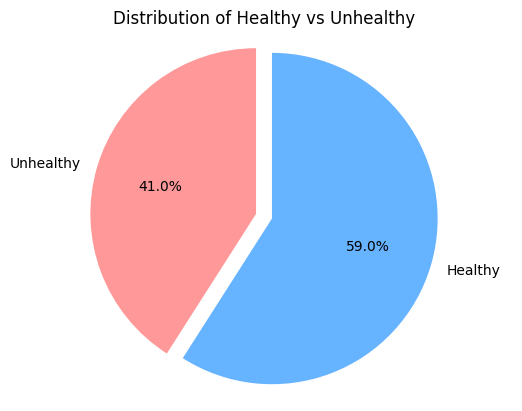

In [8]:
#plotting pie chart for healthy and unhealthy recipes
import pandas as pd
import matplotlib.pyplot as plt


# Count the occurrences of each value in the 'Healthy' column
healthy_counts = df['healthy'].value_counts()

# Extract the counts for 0 and 1
unhealthy_count = healthy_counts[0]
healthy_count = healthy_counts[1]

# Data for the pie chart
labels = ['Unhealthy', 'Healthy']
sizes = [unhealthy_count, healthy_count]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  # Explode the first slice (Unhealthy)

# Plotting the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle

# Displaying the chart
plt.title('Distribution of Healthy vs Unhealthy')
plt.show()


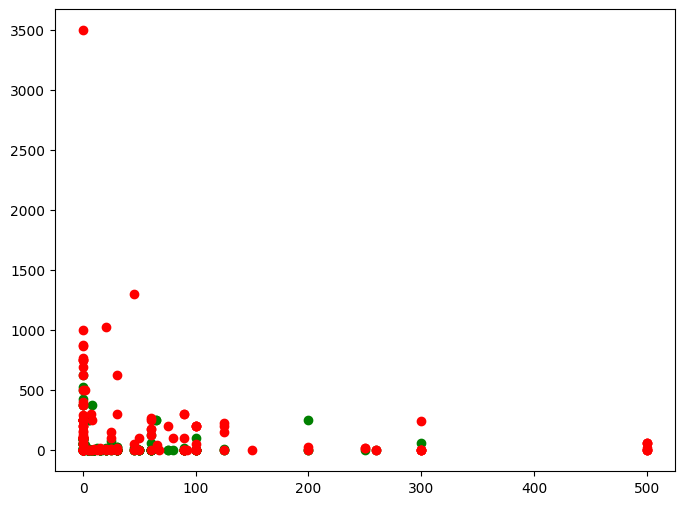

In [9]:
# Create another figure 2 
plt.figure(figsize=(8, 6))

# Scatter with postivie examples 
plt.scatter (df.oil[df.healthy==1],
df.dairy_product[df.healthy==1],
c="green")
# Scatter with negative examples 
plt.scatter (df.oil[df.healthy==0],
df.dairy_product[df.healthy==0],
c="red")

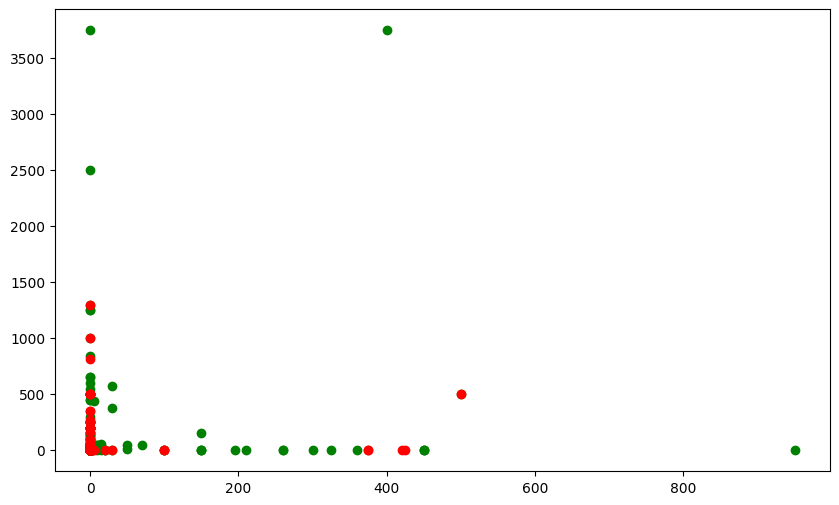

In [10]:
# Create another figure 2 
plt.figure(figsize=(10, 6))

# Scatter with postivie examples 
plt.scatter (df.fruits[df.healthy==1],
df.vegetables[df.healthy==1],
c="green")
# Scatter with negative examples 
plt.scatter (df.fruits[df.healthy==0],
df.vegetables[df.healthy==0],
c="red")


In [11]:
# Everything except target variable
X = df.drop("healthy", axis=1)

# Target variable
y = df.healthy.values

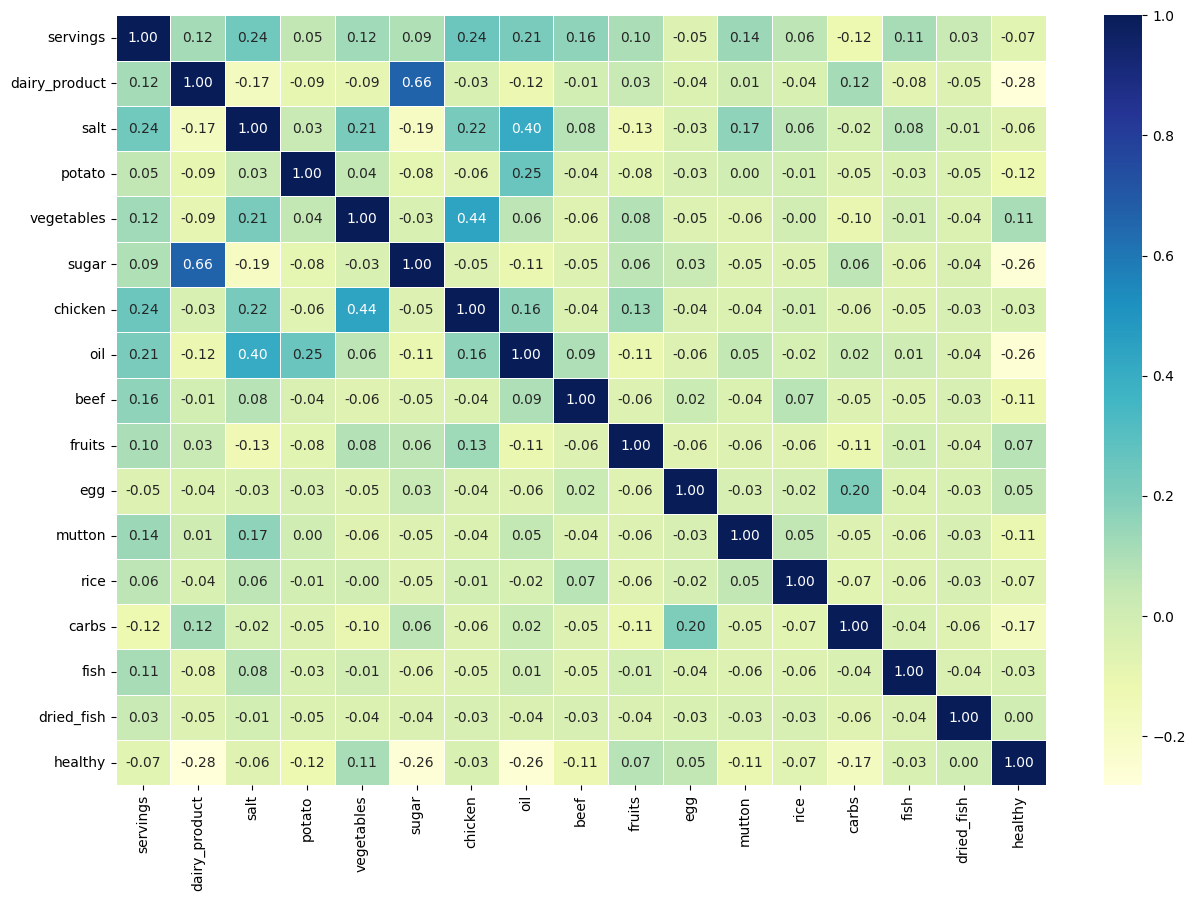

In [12]:
# Let's make our correlation matrix a little prettier 

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
annot=True,
linewidths=0.5,
fmt=".2f",
cmap="YlGnBu")

In [13]:
# apply normalization techniques
for column in df.columns:
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())    
  
# view normalized data
print(df)

     servings  dairy_product      salt  potato  vegetables  sugar   chicken   
0    0.333333       0.000000  0.133333    0.25         0.0    0.0  0.000000  \
1    0.111111       0.000000  0.066667    0.15         0.0    0.0  0.000000   
2    0.111111       0.001429  0.066667    0.15         0.0    0.0  0.000000   
3    0.111111       0.000000  0.133333    0.25         0.0    0.0  0.000000   
4    0.111111       0.001429  0.133333    0.25         0.0    0.0  0.000000   
..        ...            ...       ...     ...         ...    ...       ...   
310  0.333333       0.012857  0.070000    0.00         0.0    0.0  0.000000   
311  0.111111       0.071429  0.166667    0.00         0.0    0.0  0.220426   
312  0.666667       1.000000  0.000000    0.00         0.0    1.0  0.000000   
313  0.333333       0.057143  0.400000    0.10         0.0    0.0  0.000000   
314  0.333333       0.285714  0.000000    0.00         0.0    1.0  0.000000   

       oil  beef  fruits       egg  mutton  rice   

In [14]:
# Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set

In [15]:
X_test.head()

,servings,dairy_product,salt,potato,vegetables,sugar,chicken,oil,beef,fruits,egg,mutton,rice,carbs,fish,dried_fish
206,2,250.0,0.0,0,0.0,0.0,0.0,5.0,0.0,0.0,0,0,0,250,0,0
33,4,0.0,8.0,0,0.0,0.0,1000.0,100.0,0.0,0.0,0,0,0,0,0,0
163,2,0.0,3.0,0,45.0,0.0,0.0,0.0,0.0,50.0,0,0,0,0,0,0
78,4,405.0,2.0,0,0.0,125.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0
93,6,0.0,2.5,0,0.0,0.0,0.0,15.0,0.0,0.0,6,0,0,0,0,0


In [16]:
y_test, len(y_test)

(array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
        1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
        1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0],
       dtype=int64),
 63)

In [17]:
X_train.head()

,servings,dairy_product,salt,potato,vegetables,sugar,chicken,oil,beef,fruits,egg,mutton,rice,carbs,fish,dried_fish
221,4,250.0,2.1,0,200.0,2.1,0.0,8.4,0.0,0.0,0,0,0,0,0,0
132,1,0.0,4.0,0,0.0,0.0,0.0,100.0,0.0,0.0,0,0,0,65,0,0
155,1,100.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,50,0,0
94,5,0.0,4.5,0,0.0,0.0,0.0,50.0,0.0,0.0,0,0,0,0,0,0
245,1,530.0,0.0,0,0.0,25.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0


In [18]:
y_train, len(y_train)

(array([0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
        0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
        1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
        0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
        1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
        1, 1, 1, 0, 1, 1, 0, 1, 1, 0], dtype=int64),
 252)

In [19]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier(),
          "SVC": SVC(),
          "Gaussian NB": GaussianNB(),
          "Multinomial NB": MultinomialNB(),
          "SGD Classifier": SGDClassifier(),
          "Decision Tree Classifier": DecisionTreeClassifier(),
          "AdaBoosting Classifier": AdaBoostClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels associated with training data
    y_test : labels associated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Suppress convergence warnings
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=ConvergenceWarning)
            # Fit the model to the data
            model.fit(X_train, y_train)
        # Make predictions on the test data
        y_pred = model.predict(X_test)
        # Calculate accuracy, precision, recall, and F1-score
        train_accuracy = model.score(X_train, y_train)
        test_accuracy = model.score(X_test, y_test)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        # Store the scores in the model_scores dictionary
        model_scores[name] = {'Training Accuracy': train_accuracy,'Testing Accuracy': test_accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}
    return model_scores

model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores



{'KNN': {'Training Accuracy': 0.8055555555555556,
  'Testing Accuracy': 0.6984126984126984,
  'Precision': 0.6829268292682927,
  'Recall': 0.8235294117647058,
  'F1 Score': 0.7466666666666667},
 'Logistic Regression': {'Training Accuracy': 0.7777777777777778,
  'Testing Accuracy': 0.6984126984126984,
  'Precision': 0.6666666666666666,
  'Recall': 0.8823529411764706,
  'F1 Score': 0.7594936708860759},
 'Random Forest': {'Training Accuracy': 0.996031746031746,
  'Testing Accuracy': 0.7619047619047619,
  'Precision': 0.7435897435897436,
  'Recall': 0.8529411764705882,
  'F1 Score': 0.7945205479452054},
 'SVC': {'Training Accuracy': 0.7658730158730159,
  'Testing Accuracy': 0.6984126984126984,
  'Precision': 0.6744186046511628,
  'Recall': 0.8529411764705882,
  'F1 Score': 0.7532467532467532},
 'Gaussian NB': {'Training Accuracy': 0.75,
  'Testing Accuracy': 0.6825396825396826,
  'Precision': 0.6666666666666666,
  'Recall': 0.8235294117647058,
  'F1 Score': 0.7368421052631577},
 'Multinomi

In [20]:
# Create a DataFrame from the model scores dictionary
scores_df = pd.DataFrame.from_dict(model_scores, orient='index')
scores_df['Training Accuracy'] = scores_df['Training Accuracy'].map('{:.2%}'.format)

# Convert DataFrame to HTML table
html_table = scores_df.to_html()

# Display the HTML table
print(html_table)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Training Accuracy</th>
      <th>Testing Accuracy</th>
      <th>Precision</th>
      <th>Recall</th>
      <th>F1 Score</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>KNN</th>
      <td>80.56%</td>
      <td>0.698413</td>
      <td>0.682927</td>
      <td>0.823529</td>
      <td>0.746667</td>
    </tr>
    <tr>
      <th>Logistic Regression</th>
      <td>77.78%</td>
      <td>0.698413</td>
      <td>0.666667</td>
      <td>0.882353</td>
      <td>0.759494</td>
    </tr>
    <tr>
      <th>Random Forest</th>
      <td>99.60%</td>
      <td>0.761905</td>
      <td>0.743590</td>
      <td>0.852941</td>
      <td>0.794521</td>
    </tr>
    <tr>
      <th>SVC</th>
      <td>76.59%</td>
      <td>0.698413</td>
      <td>0.674419</td>
      <td>0.852941</td>
      <td>0.753247</td>
    </tr>
    <tr>
      <th>Gaussian NB</th>
      <td>75.00%</td>
      <td>0.682540</td>
  

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels associated with training data
    y_test : labels associated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Suppress convergence warnings
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=ConvergenceWarning)
            # Fit the model to the data
            model.fit(X_train, y_train)
        # Make predictions on the test data
        y_pred = model.predict(X_test)
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        # Store the scores in the model_scores dictionary
        model_scores[name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        }
    return model_scores

model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores


{'KNN': {'Accuracy': 0.6984126984126984,
  'Precision': 0.6829268292682927,
  'Recall': 0.8235294117647058,
  'F1 Score': 0.7466666666666667},
 'Logistic Regression': {'Accuracy': 0.6984126984126984,
  'Precision': 0.6666666666666666,
  'Recall': 0.8823529411764706,
  'F1 Score': 0.7594936708860759},
 'Random Forest': {'Accuracy': 0.7619047619047619,
  'Precision': 0.7435897435897436,
  'Recall': 0.8529411764705882,
  'F1 Score': 0.7945205479452054},
 'SVC': {'Accuracy': 0.6984126984126984,
  'Precision': 0.6744186046511628,
  'Recall': 0.8529411764705882,
  'F1 Score': 0.7532467532467532},
 'Gaussian NB': {'Accuracy': 0.6825396825396826,
  'Precision': 0.6666666666666666,
  'Recall': 0.8235294117647058,
  'F1 Score': 0.7368421052631577},
 'Multinomial NB': {'Accuracy': 0.6031746031746031,
  'Precision': 0.6451612903225806,
  'Recall': 0.5882352941176471,
  'F1 Score': 0.6153846153846154},
 'SGD Classifier': {'Accuracy': 0.5396825396825397,
  'Precision': 0.5862068965517241,
  'Recall'

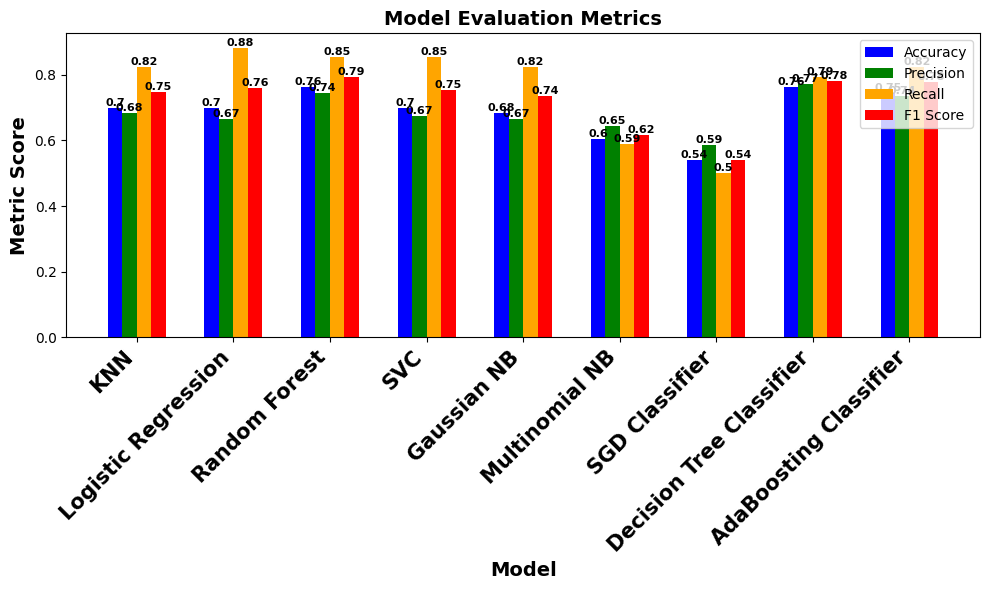

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Convert the model_scores dictionary to a DataFrame
metrics_df = pd.DataFrame.from_dict(model_scores, orient='index')

# Set the figure size
plt.figure(figsize=(10, 6))

# Define the number of models and metrics
num_models = len(metrics_df)
num_metrics = len(metrics_df.columns)

# Define the width of each bar
bar_width = 0.15

# Set the positions of the bars on the x-axis
bar_positions = np.arange(num_models)

# Set the colors for each metric
colors = ['blue', 'green', 'orange', 'red']

# Plot the bars for all metrics
for i, metric in enumerate(metrics_df.columns):
    plt.bar(bar_positions + (i * bar_width), metrics_df[metric], width=bar_width, label=metric, color=colors[i])
    # Add value annotation on top of each bar
    for j, value in enumerate(metrics_df[metric]):
        plt.text(bar_positions[j] + (i * bar_width), value, str(round(value, 2)), ha='center', va='bottom', fontsize=8, fontweight='bold')

# Set the x-axis ticks and labels
plt.xticks(bar_positions + (bar_width * (num_metrics - 1) / 2), metrics_df.index, rotation=45, ha='right', fontsize=15, fontweight='bold')

# Set the labels and title
plt.xlabel('Model', fontsize=14, fontweight='bold')
plt.ylabel('Metric Score', fontsize=14, fontweight='bold')
plt.title('Model Evaluation Metrics', fontsize=14, fontweight='bold')

# Add a legend
plt.legend()

# Display the bar chart
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

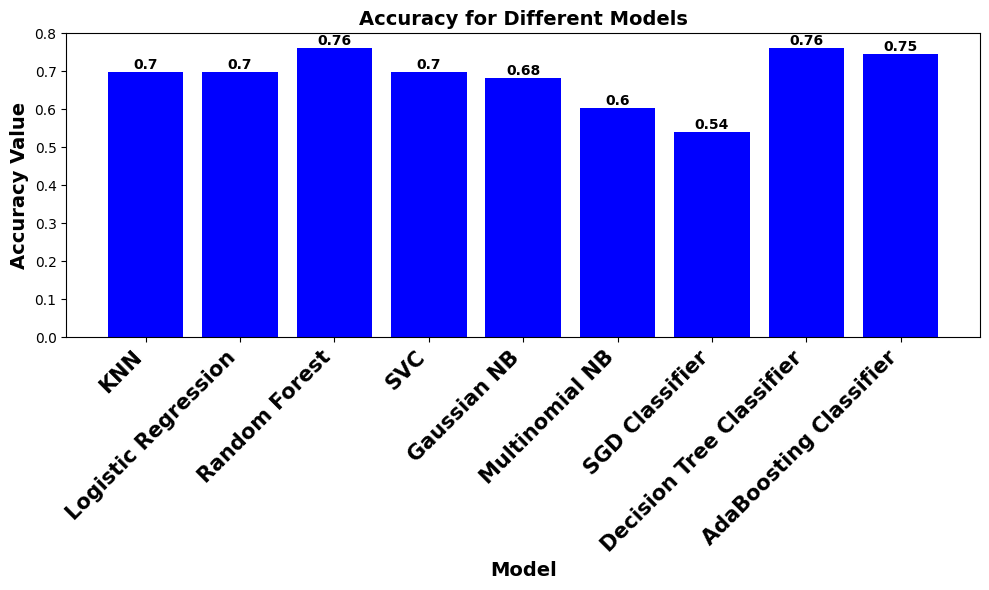

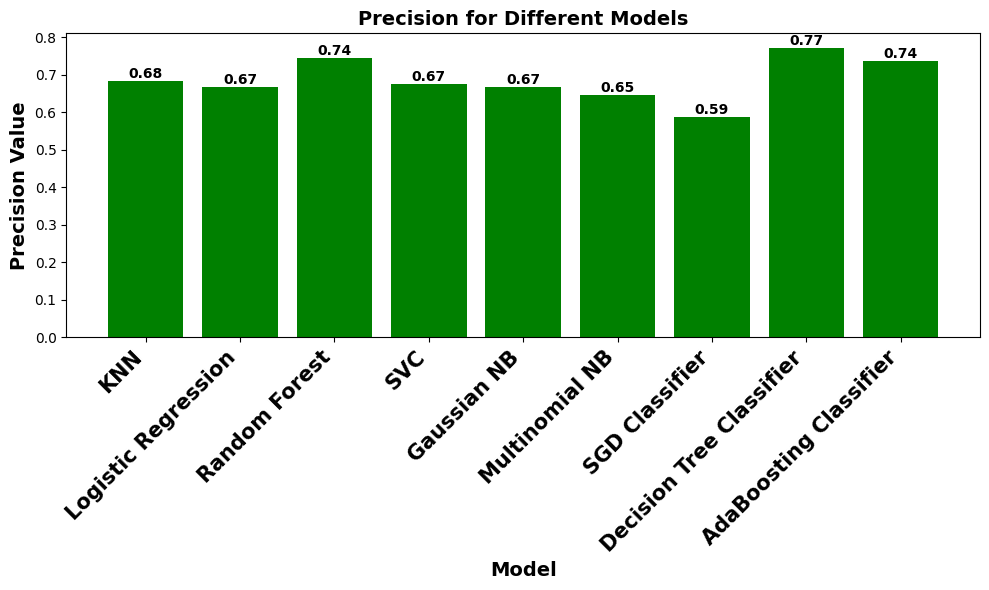

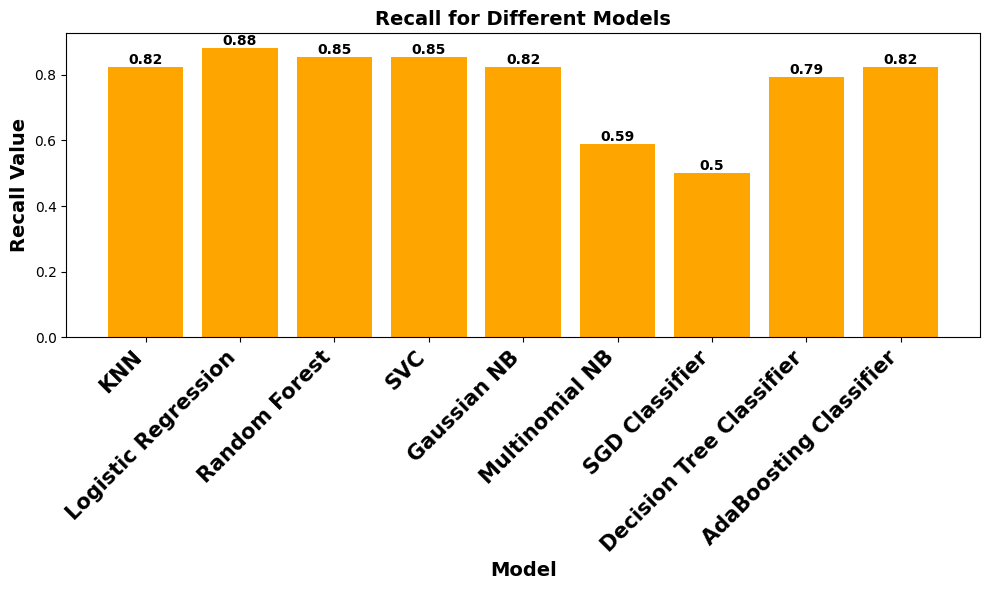

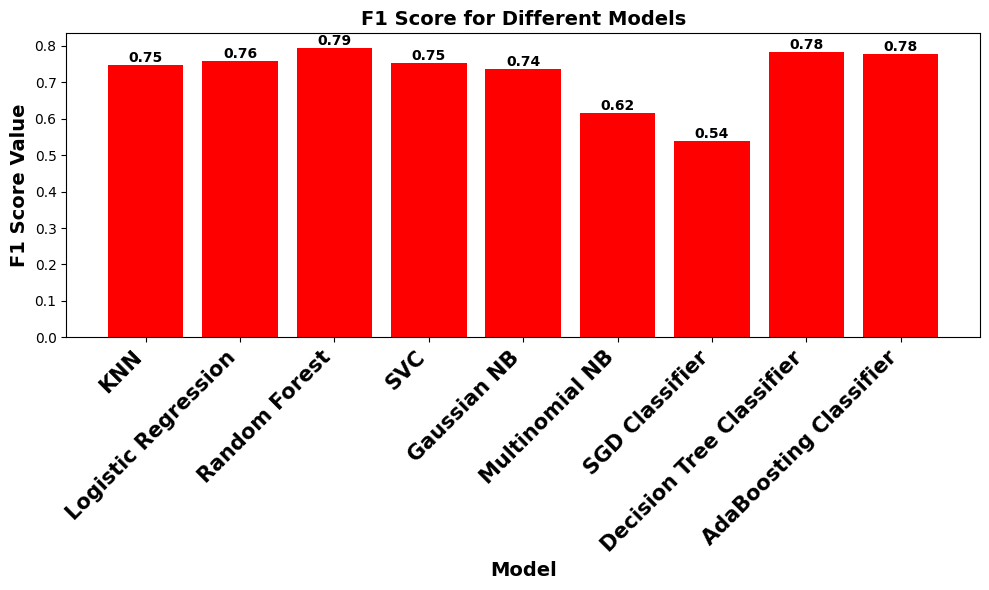

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Convert the model_scores dictionary to a DataFrame
metrics_df = pd.DataFrame.from_dict(model_scores, orient='index')

# Set the figure size
plt.figure(figsize=(10, 6))

# Define the number of models and metrics
num_models = len(metrics_df)
num_metrics = len(metrics_df.columns)

# Define the colors for each metric
colors = ['blue', 'green', 'orange', 'red']

# Create a separate graph for each metric (parameter)
for i, metric in enumerate(metrics_df.columns):
    plt.figure(figsize=(10, 6))  # Create a new figure for each metric

    # Get the metric values for all models
    metric_values = metrics_df[metric]

    # Set the x-axis labels to be the model names
    plt.xticks(range(num_models), metric_values.index, rotation=45, ha='right', fontsize=15, fontweight='bold')

    # Plot the values for the current metric
    plt.bar(range(num_models), metric_values, color=colors[i])

    # Add value annotation on top of each bar
    for j, value in enumerate(metric_values):
        plt.text(j, value, str(round(value, 2)), ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

    # Set the labels and title for the current metric
    plt.xlabel('Model', fontsize=14, fontweight='bold')
    plt.ylabel(f'{metric} Value', fontsize=14, fontweight='bold')
    plt.title(f'{metric} for Different Models', fontsize=14, fontweight='bold')

    # Display the graph for the current metric
    plt.tight_layout()

# Show all graphs
plt.show()


In [34]:
import matplotlib.pyplot as plt

# Collect values from the first snippet
model_names = metrics_df.index
accuracy_scores = metrics_df['Accuracy']
precision_scores = metrics_df['Precision']
recall_scores = metrics_df['Recall']
f1_scores = metrics_df['F1 Score']

# Define colors for each histogram
colors = ['blue', 'orange', 'green', 'red']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot accuracy scores
ax.bar(model_names, accuracy_scores, color=colors[0])
ax.set_title('Accuracy for Different Models', fontsize=14, fontweight='bold')
ax.set_xlabel('Models', fontsize=14, fontweight='bold')
ax.set_ylabel('Accuracy', fontsize=14, fontweight='bold')

# Add value labels on top of each bar
for i, v in enumerate(accuracy_scores):
    ax.text(i, v + 0.01, str(round(v, 3)), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, fontsize=15, fontweight='bold')

# Display the accuracy scores
plt.show()

# Create a new figure and axis for precision scores
fig, ax = plt.subplots(figsize=(10, 6))

# Plot precision scores
ax.bar(model_names, precision_scores, color=colors[1])
ax.set_title('Precision for Different Models', fontsize=14, fontweight='bold')
ax.set_xlabel('Models', fontsize=14, fontweight='bold')
ax.set_ylabel('Precision', fontsize=14, fontweight='bold')

# Add value labels on top of each bar
for i, v in enumerate(precision_scores):
    ax.text(i, v + 0.01, str(round(v, 3)), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, fontsize=15, fontweight='bold')

# Display the precision scores
plt.show()

# Create a new figure and axis for recall scores
fig, ax = plt.subplots(figsize=(10, 6))

# Plot recall scores
ax.bar(model_names, recall_scores, color=colors[2])
ax.set_title('Recall for Different Models', fontsize=14, fontweight='bold')
ax.set_xlabel('Models', fontsize=14, fontweight='bold')
ax.set_ylabel('Recall', fontsize=14, fontweight='bold')

# Add value labels on top of each bar
for i, v in enumerate(recall_scores):
    ax.text(i, v + 0.01, str(round(v, 3)), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, fontsize=15, fontweight='bold')

# Display the recall scores
plt.show()

# Create a new figure and axis for F1-scores
fig, ax = plt.subplots(figsize=(10, 6))

# Plot F1-scores
ax.bar(model_names, f1_scores, color=colors[3])
ax.set_title('F1 Score for Different Models', fontsize=14, fontweight='bold')
ax.set_xlabel('Models', fontsize=14, fontweight='bold')
ax.set_ylabel('F1 Score', fontsize=14, fontweight='bold')

# Add value labels on top of each bar
for i, v in enumerate(f1_scores):
    ax.text(i, v + 0.01, str(round(v, 3)), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, fontsize=15, fontweight='bold')

# Display the F1-scores
plt.show()


KeyError: 'Accuracy'

In [ ]:
feature_names = ["servings","dairy_product","salt","potato","vegetables","sugar","chicken","oil","beef","fruits","egg","mutton","rice","carbs","fish","dried_fish"]


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train is a pandas DataFrame without feature names
feature_names = ["servings","dairy_product","salt","potato","vegetables","sugar","chicken","oil","beef","fruits","egg","mutton","rice","carbs","fish","dried_fish"]  # Replace with your actual feature names

X_train.columns = feature_names

rand_model = RandomForestClassifier()
rand_model.fit(X_train, y_train)

res_rand = rand_model.predict([[2,20,10,0,10,18,0,100,0,0,0,0,0,0,100,0]])

print(res_rand)


[1]


C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


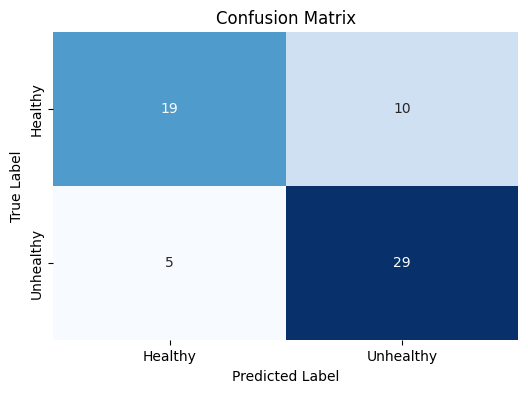

In [ ]:
# Make predictions using your model
y_pred = rand_model.predict(X_test)

# Assign class labels
class_labels = ['Healthy', 'Unhealthy']

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


0.8610547667342798


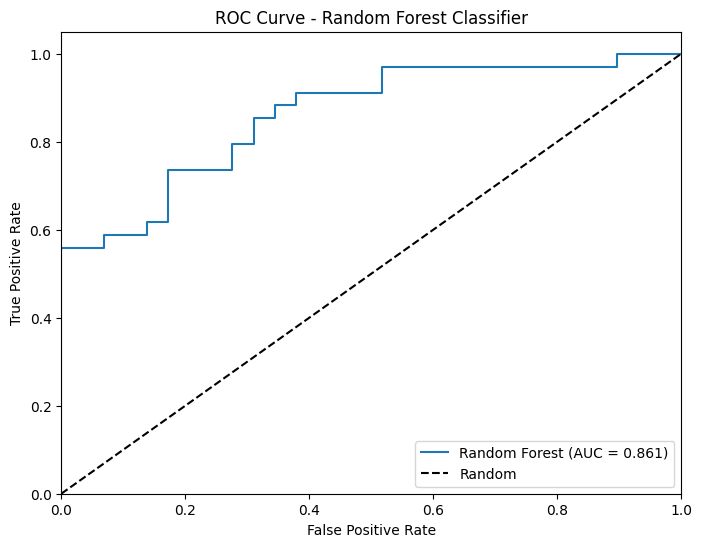

In [ ]:
#ROC CURVE

# Predict probabilities for the positive class
y_proba = rand_model.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Compute the area under the ROC curve (AUC)
auc = roc_auc_score(y_test, y_proba)
print(auc)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.3f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Classifier')
plt.legend(loc='lower right')
plt.show()


In [ ]:
import pickle

# Save the model to a .pkl file
def save_model(rand_model, filename):
    with open(filename, 'wb') as file:
        pickle.dump(rand_model, file)

# Load the model from a .pkl file
def load_model(filename):
    with open(filename, 'rb') as file:
        rand_model = pickle.load(file)
    return rand_model


# Save the model
save_model(rand_model, 'model.pkl')

# Load the model
loaded_model = load_model('model.pkl')

# Use the loaded model for predictions
predictions = loaded_model.predict([[2,20,10,0,10,18,0,100,0,0,0,0,0,0,100,0]])
print(predictions)


[1]


C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
a = "5	20	10	0	1006	18	0	45	0	0	0	0	0	0	100	0"

a = a.replace("\t", ",")
print(a)

5,20,10,0,1006,18,0,45,0,0,0,0,0,0,100,0
